In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/upi-transactions-2024-dataset/upi_transactions_2024.csv


In [2]:
import matplotlib.pyplot as plt

In [3]:
# dataset importing 
df = pd.read_csv("/kaggle/input/upi-transactions-2024-dataset/upi_transactions_2024.csv")

In [4]:
df.head()

,transaction id,timestamp,transaction type,merchant_category,amount (INR),transaction_status,sender_age_group,receiver_age_group,sender_state,sender_bank,receiver_bank,device_type,network_type,fraud_flag,hour_of_day,day_of_week,is_weekend
0,TXN0000000001,2024-10-08 15:17:28,P2P,Entertainment,868,SUCCESS,26-35,18-25,Delhi,Axis,SBI,Android,4G,0,15,Tuesday,0
1,TXN0000000002,2024-04-11 06:56:00,P2M,Grocery,1011,SUCCESS,26-35,26-35,Uttar Pradesh,ICICI,Axis,iOS,4G,0,6,Thursday,0
2,TXN0000000003,2024-04-02 13:27:18,P2P,Grocery,477,SUCCESS,26-35,36-45,Karnataka,Yes Bank,PNB,Android,4G,0,13,Tuesday,0
3,TXN0000000004,2024-01-07 10:09:17,P2P,Fuel,2784,SUCCESS,26-35,26-35,Delhi,ICICI,PNB,Android,5G,0,10,Sunday,1
4,TXN0000000005,2024-01-23 19:04:23,P2P,Shopping,990,SUCCESS,26-35,18-25,Delhi,Axis,Yes Bank,iOS,WiFi,0,19,Tuesday,0


In [5]:
# dataset shape
df.shape

(250000, 17)

In [6]:
#counting the values of type of transaction
df.groupby("transaction type")["transaction type"].count().sort_values(ascending=False)

transaction type
P2P             112445
P2M              87660
Bill Payment     37368
Recharge         12527
Name: transaction type, dtype: int64

In [7]:
# SUCCESS and failed transaction
df.groupby("transaction_status")["transaction_status"].count().sort_values(ascending=False)

transaction_status
SUCCESS    237624
FAILED      12376
Name: transaction_status, dtype: int64

In [8]:
# bank used by sender 
df.groupby("sender_bank")["sender_bank"].count().sort_values(ascending=False)

sender_bank
SBI         62693
HDFC        37485
ICICI       29769
IndusInd    25173
Axis        25042
PNB         24946
Yes Bank    24860
Kotak       20032
Name: sender_bank, dtype: int64

In [9]:
#bank used by the receiver 
df.groupby("receiver_bank")["receiver_bank"].count().sort_values(ascending=False)

receiver_bank
SBI         62378
HDFC        37651
ICICI       29944
IndusInd    25086
Yes Bank    25009
Axis        24992
PNB         24802
Kotak       20138
Name: receiver_bank, dtype: int64

In [10]:
# number of transaction done in particular category
df.groupby("merchant_category")["merchant_category"].count().sort_values(ascending=False)

merchant_category
Grocery          49966
Food             37464
Shopping         29872
Fuel             25063
Other            24828
Utilities        22338
Transport        20105
Entertainment    20103
Healthcare       12663
Education         7598
Name: merchant_category, dtype: int64

In [11]:
#  number of trnasaction by age group
df.groupby("sender_age_group")["sender_age_group"].count().sort_values(ascending=False)

sender_age_group
26-35    87432
36-45    62873
18-25    62345
46-55    24841
56+      12509
Name: sender_age_group, dtype: int64

In [12]:
# number of transaction by receivers age group
df.groupby("receiver_age_group")["receiver_age_group"].count().sort_values(ascending=False)

receiver_age_group
26-35    87864
18-25    62611
36-45    62151
46-55    24823
56+      12551
Name: receiver_age_group, dtype: int64

In [13]:
# number of transaction by state 
df.groupby("sender_state")["sender_state"].count().sort_values(ascending=False)

sender_state
Maharashtra       37427
Uttar Pradesh     30125
Karnataka         29756
Tamil Nadu        25367
Delhi             24870
Telangana         22435
Gujarat           20061
Andhra Pradesh    20006
Rajasthan         19981
West Bengal       19972
Name: sender_state, dtype: int64

In [14]:
# number of transaction by network
df.groupby("network_type")["network_type"].count().sort_values(ascending=False)

network_type
4G      149813
5G       62582
WiFi     25134
3G       12471
Name: network_type, dtype: int64

In [15]:
# Renaming a column 
df.rename(columns={"amount (INR)": "amount"}, inplace=True)

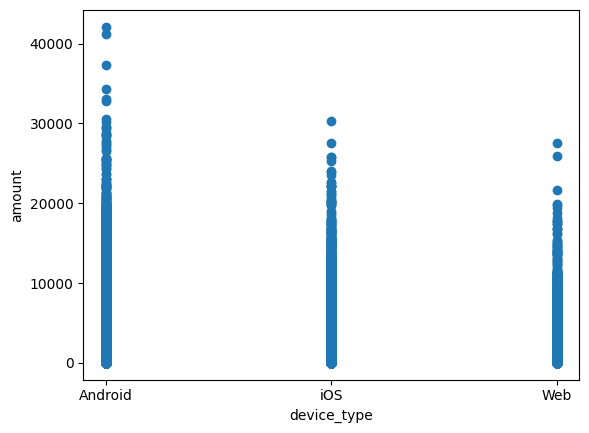

In [16]:
# ploting device vs amount
plt.scatter(df["device_type"],df["amount"])
plt.xlabel("device_type")
plt.ylabel("amount")
plt.show()

In [17]:
# number of transaction on each day
df.groupby("day_of_week")["day_of_week"].count().sort_values(ascending=False)

day_of_week
Monday       36495
Sunday       36003
Wednesday    35700
Tuesday      35540
Friday       35496
Thursday     35432
Saturday     35334
Name: day_of_week, dtype: int64

In [18]:
# number of transaction on each hours
df.groupby("hour_of_day")["hour_of_day"].count().sort_values(ascending=False)

hour_of_day
19    21232
18    20064
20    18506
17    18340
12    17516
11    16328
21    16253
13    15038
16    13992
10    13904
15    12624
14    11472
9     10450
22     9364
8      8349
23     5817
7      5630
6      3501
0      3388
1      2244
5      1742
2      1685
3      1314
4      1247
Name: hour_of_day, dtype: int64

In [19]:
# unpacking and making seperate column for each entity in date time series
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['year'] = df['timestamp'].dt.year
df['month'] = df['timestamp'].dt.month
df['day'] = df['timestamp'].dt.day
df['hour'] = df['timestamp'].dt.hour
df['minute'] = df['timestamp'].dt.minute
df['second'] = df['timestamp'].dt.second
df['weekday'] = df['timestamp'].dt.day_name()


In [20]:
df.groupby("year")["year"].count().sort_values(ascending=False)

year
2024    250000
Name: year, dtype: int64

In [21]:
df.groupby("month")["month"].count().sort_values(ascending=False)

month
5     21333
10    21252
3     21234
8     21231
1     21221
7     21207
12    20636
6     20628
9     20597
4     20536
11    20366
2     19759
Name: month, dtype: int64

In [22]:
days = df.groupby("day")["day"].count()

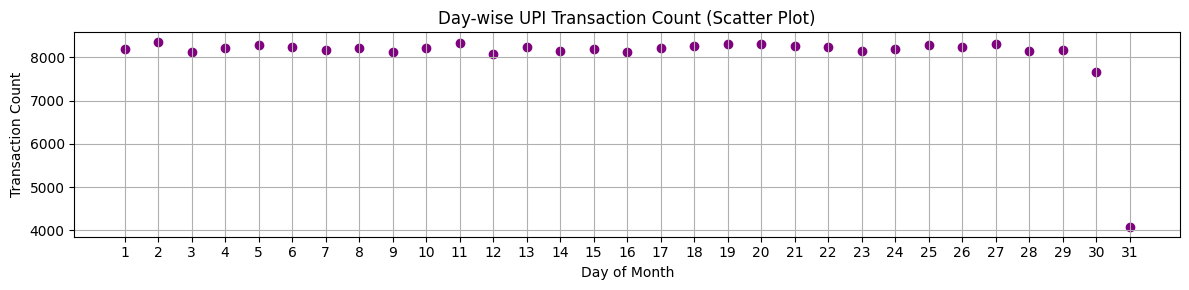

In [23]:
day_series = pd.Series(days)

# Scatter plot
plt.figure(figsize=(12, 3))
plt.scatter(day_series.index, day_series.values, color='purple')
plt.title("Day-wise UPI Transaction Count (Scatter Plot)")
plt.xlabel("Day of Month")
plt.ylabel("Transaction Count")
plt.grid(True)
plt.xticks(range(1, 32))
plt.tight_layout()
plt.show()

In [24]:
df.groupby("sender_bank")["amount"].sum().sort_values(ascending=False)

sender_bank
SBI         82816520
HDFC        49791194
ICICI       38731193
IndusInd    32842711
Yes Bank    32492477
PNB         32476972
Axis        32472530
Kotak       26315412
Name: amount, dtype: int64

In [25]:
df.groupby("day")["amount"].sum().sort_values(ascending=False)

day
11    11135736
25    11067517
20    11053135
4     11028859
19    11019610
21    10988522
2     10975430
27    10880833
15    10853206
22    10825969
5     10811755
24    10794466
29    10794153
26    10790257
8     10738223
7     10733606
6     10726786
1     10725035
13    10717066
9     10707890
17    10682852
10    10651291
18    10637212
3     10600194
28    10589708
12    10570825
23    10569146
14    10520124
16    10464979
30     9952456
31     5332168
Name: amount, dtype: int64

In [26]:
df.groupby("month")["amount"].sum().sort_values(ascending=False)


month
7     28079905
5     28024857
10    27866829
8     27845907
3     27508202
1     27456691
12    27311087
9     27105761
6     27032118
4     26988791
11    26892531
2     25826330
Name: amount, dtype: int64

In [27]:
df.groupby("sender_state")["amount"].sum().sort_values(ascending=False)

sender_state
Maharashtra       49043948
Uttar Pradesh     40035717
Karnataka         38451158
Tamil Nadu        33343518
Delhi             32689865
Telangana         29750930
Rajasthan         26730470
Gujarat           25988190
Andhra Pradesh    25952619
West Bengal       25952594
Name: amount, dtype: int64

In [28]:
df.groupby("day_of_week")["amount"].sum().sort_values(ascending=False)


day_of_week
Monday       47882908
Sunday       47572544
Tuesday      46846390
Wednesday    46815663
Thursday     46620985
Friday       46332583
Saturday     45867936
Name: amount, dtype: int64

In [29]:
df.groupby("hour")["amount"].sum().sort_values(ascending=False)


hour
19    28223522
18    26297174
17    24514186
20    23822014
12    23406280
11    21193161
21    20995491
13    19847819
10    18337313
16    17921125
15    16658144
14    14848621
9     13809021
22    12050824
8     10979614
23     7830425
7      7482766
6      4617034
0      4532884
1      2914350
2      2173750
5      2134122
3      1678669
4      1670700
Name: amount, dtype: int64

In [30]:
total_success_amount = df[df['transaction_status'] == 'SUCCESS']['amount'].sum()
total_success_tansaction = df[df['transaction_status'] == 'SUCCESS'].shape[0]
average_transaction_value = total_success_amount/total_success_tansaction
average_transaction_value

1309.555482611184

In [31]:
total_failed_amount = df[df['transaction_status'] == 'FAILED']["amount"].sum()
total_failed_amount
total_failed_transaction = df[df['transaction_status'] == 'FAILED'].shape[0]
total_failed_transaction
average_transaction_value_of_failed = total_failed_amount/total_failed_transaction
average_transaction_value_of_failed

1354.0075145442793

In [32]:
state_tansaction_data = df[df['transaction_status'] == 'SUCCESS'].groupby(['sender_state'])["amount"].sum()
print(state_tansaction_data)

sender_state
Andhra Pradesh    24629406
Delhi             30967845
Gujarat           24675791
Karnataka         36427263
Maharashtra       46578532
Rajasthan         25380195
Tamil Nadu        31540228
Telangana         28313433
Uttar Pradesh     38020230
West Bengal       24648889
Name: amount, dtype: int64


In [33]:
total_state_transaction = df[df['transaction_status'] == 'SUCCESS'].groupby(['sender_state'])["amount"].count()
type(total_state_transaction)

pandas.core.series.Series

In [34]:
avg_order_value_state = []
for i in range(len(total_state_transaction)):
    avg_order_value_state.append(state_tansaction_data[i]/total_state_transaction[i])
avg_order_value_state

/tmp/ipykernel_13/3761697881.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  avg_order_value_state.append(state_tansaction_data[i]/total_state_transaction[i])


[1295.8753025360413,
 1310.3645326450303,
 1291.7909642969323,
 1286.7732169981277,
 1308.9372488408037,
 1334.1846711875098,
 1310.4087415347542,
 1324.3572197015762,
 1331.566910657374,
 1299.7041392037966]

In [35]:
state_df = total_state_transaction.to_frame()
state_df["avg_val"] = avg_order_value_state

In [36]:
state_df.sort_values(by="avg_val",ascending=False)


,amount,avg_val
sender_state,,
Rajasthan,19023,1334.184671
Uttar Pradesh,28553,1331.566911
Telangana,21379,1324.357220
Tamil Nadu,24069,1310.408742
Delhi,23633,1310.364533
Maharashtra,35585,1308.937249
West Bengal,18965,1299.704139
Andhra Pradesh,19006,1295.875303
Gujarat,19102,1291.790964


In [37]:
df.columns

Index(['transaction id', 'timestamp', 'transaction type', 'merchant_category',
       'amount', 'transaction_status', 'sender_age_group',
       'receiver_age_group', 'sender_state', 'sender_bank', 'receiver_bank',
       'device_type', 'network_type', 'fraud_flag', 'hour_of_day',
       'day_of_week', 'is_weekend', 'year', 'month', 'day', 'hour', 'minute',
       'second', 'weekday'],
      dtype='object')

In [38]:
 df.groupby("transaction_status")["transaction_status"].count().values
failed = df.groupby("transaction_status")["transaction_status"].count().values[0]
success = df.groupby("transaction_status")["transaction_status"].count().values[1]
total = failed + success 
failed_percentage = failed/total*100
success_percentage = success/total*100

In [39]:
df["sender_bank"][df.groupby("transaction_status")["transaction_status"].count()]

12376     SBI
237624    SBI
Name: sender_bank, dtype: object

In [40]:
bank_data = df.groupby(['sender_bank', 'transaction_status']).size().unstack()
bank_data

transaction_status,FAILED,SUCCESS
sender_bank,,
Axis,1239,23803
HDFC,1808,35677
ICICI,1499,28270
IndusInd,1247,23926
Kotak,998,19034
PNB,1221,23725
SBI,3095,59598
Yes Bank,1269,23591


In [41]:
failed = []
for i in bank_data["FAILED"]:
    failed.append(i)
success = []
for i in bank_data["SUCCESS"]:
    success.append(i)
percent = []
for i in range(len(success)):
    percent.append(failed[i]/(failed[i]+success[i])*100)
print(percent)

[4.947687884354285, 4.823262638388689, 5.035439551210992, 4.9537202558296585, 4.98202875399361, 4.894572276116412, 4.9367552996347275, 5.1045856798069185]


In [42]:
bank_data["percentage"] = percent

In [43]:
bank_data.sort_values(by='percentage', ascending=False)

transaction_status,FAILED,SUCCESS,percentage
sender_bank,,,
Yes Bank,1269,23591,5.104586
ICICI,1499,28270,5.035440
Kotak,998,19034,4.982029
IndusInd,1247,23926,4.953720
Axis,1239,23803,4.947688
SBI,3095,59598,4.936755
PNB,1221,23725,4.894572
HDFC,1808,35677,4.823263


In [44]:
df.head()

,transaction id,timestamp,transaction type,merchant_category,amount,transaction_status,sender_age_group,receiver_age_group,sender_state,sender_bank,...,hour_of_day,day_of_week,is_weekend,year,month,day,hour,minute,second,weekday
0,TXN0000000001,2024-10-08 15:17:28,P2P,Entertainment,868,SUCCESS,26-35,18-25,Delhi,Axis,...,15,Tuesday,0,2024,10,8,15,17,28,Tuesday
1,TXN0000000002,2024-04-11 06:56:00,P2M,Grocery,1011,SUCCESS,26-35,26-35,Uttar Pradesh,ICICI,...,6,Thursday,0,2024,4,11,6,56,0,Thursday
2,TXN0000000003,2024-04-02 13:27:18,P2P,Grocery,477,SUCCESS,26-35,36-45,Karnataka,Yes Bank,...,13,Tuesday,0,2024,4,2,13,27,18,Tuesday
3,TXN0000000004,2024-01-07 10:09:17,P2P,Fuel,2784,SUCCESS,26-35,26-35,Delhi,ICICI,...,10,Sunday,1,2024,1,7,10,9,17,Sunday
4,TXN0000000005,2024-01-23 19:04:23,P2P,Shopping,990,SUCCESS,26-35,18-25,Delhi,Axis,...,19,Tuesday,0,2024,1,23,19,4,23,Tuesday


In [45]:
device_success_failed = df.groupby(['device_type','transaction_status']).size().unstack()
device_success_failed["percent"] = device_success_failed["FAILED"]/(device_success_failed["FAILED"]+device_success_failed["SUCCESS"])*100
device_success_failed.sort_values(by="percent", ascending=False)

transaction_status,FAILED,SUCCESS,percent
device_type,,,
Web,650,11960,5.154639
Android,9278,178499,4.940967
iOS,2448,47165,4.934191


In [46]:
device_success_failed = df.groupby(['device_type','transaction_status']).size().unstack()
device_success_failed["percent"] = device_success_failed["FAILED"]/(device_success_failed["FAILED"]+device_success_failed["SUCCESS"])*100
device_success_failed.sort_values(by="percent", ascending=False)
device_success_failed

transaction_status,FAILED,SUCCESS,percent
device_type,,,
Android,9278,178499,4.940967
Web,650,11960,5.154639
iOS,2448,47165,4.934191


In [47]:
network_success_failed = df.groupby(['network_type','transaction_status']).size().unstack()
network_success_failed["percent"] = network_success_failed["FAILED"]/(network_success_failed["FAILED"]+network_success_failed["SUCCESS"])*100
network_success_failed.sort_values(by="percent", ascending=False)

transaction_status,FAILED,SUCCESS,percent
network_type,,,
3G,651,11820,5.220111
4G,7464,142349,4.982211
WiFi,1222,23912,4.861940
5G,3039,59543,4.856029


In [48]:
df1 = pd.read_csv("/kaggle/input/upi-transactions-2024-dataset/upi_transactions_2024.csv")

In [49]:
flag = df.groupby("fraud_flag")["amount"].count()
flag

fraud_flag
0    249520
1       480
Name: amount, dtype: int64

In [50]:
total = df.shape[0]
j=0
for i in flag:
    if j==1:
        print(int(i/total*100))
    j=j+1 

0


In [51]:
fraud_bank = df.groupby(["sender_bank","fraud_flag"])["amount"].count().to_frame()
a = []
b = []
j=0
for i in fraud_bank["amount"]:
    if j%2==0:
        a.append(i)
    else:
        b.append(i)
    j=j+1
c = [] 
print(a)
print(b)
length_bank = fraud_bank.shape[0]/2
for i in range(int(length_bank)):
    c.append(b[i]/a[i]*10000)
    c.append("")
print(c)
fraud_bank["percent_of_Fraud"] = c
fraud_bank

[24993, 37423, 29703, 25121, 19982, 24894, 62584, 24820]
[49, 62, 66, 52, 50, 52, 109, 40]
[19.605489537070383, '', 16.567351628677553, '', 22.21997778002222, '', 20.699812905537197, '', 25.02252026824142, '', 20.88856752631156, '', 17.416592100217308, '', 16.116035455278002, '']


amount percent_of_Fraud
sender_bank fraud_flag                         
Axis        0            24993         19.60549
            1               49                 
HDFC        0            37423        16.567352
            1               62                 
ICICI       0            29703        22.219978
            1               66                 
IndusInd    0            25121        20.699813
            1               52                 
Kotak       0            19982         25.02252
            1               50                 
PNB         0            24894        20.888568
            1               52                 
SBI         0            62584        17.416592
            1              109                 
Yes Bank    0            24820        16.116035
            1               40

In [52]:
df1.head(1)

,transaction id,timestamp,transaction type,merchant_category,amount (INR),transaction_status,sender_age_group,receiver_age_group,sender_state,sender_bank,receiver_bank,device_type,network_type,fraud_flag,hour_of_day,day_of_week,is_weekend
0,TXN0000000001,2024-10-08 15:17:28,P2P,Entertainment,868,SUCCESS,26-35,18-25,Delhi,Axis,SBI,Android,4G,0,15,Tuesday,0


In [53]:
a = df1.groupby("sender_bank")["amount (INR)"].count()
b = df1.groupby("receiver_bank")["amount (INR)"].count()
c = []
for i, j in zip(a, b):
    c.append(i+j)

In [54]:
a = a.to_frame()

In [55]:
a["number_of_transacttion"] = c

In [56]:
a.sort_values(by="number_of_transacttion", ascending=False)

,amount (INR),number_of_transacttion
sender_bank,,
SBI,62693,125071
HDFC,37485,75136
ICICI,29769,59713
IndusInd,25173,50259
Axis,25042,50034
Yes Bank,24860,49869
PNB,24946,49748
Kotak,20032,40170


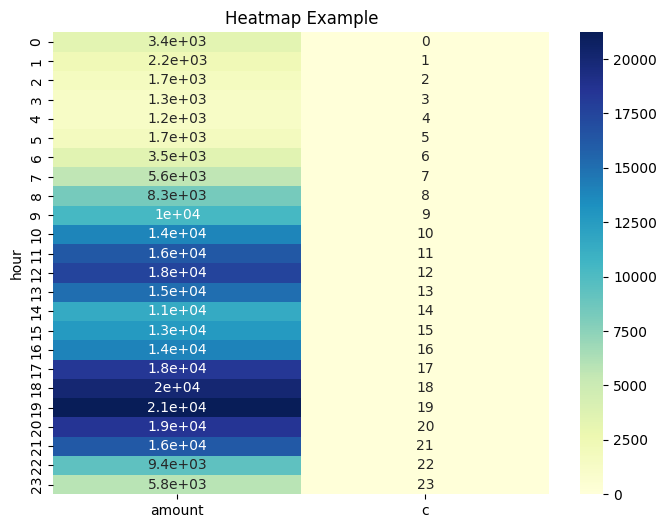

In [57]:
import seaborn as sns
d = df.groupby("hour")["amount"].count().to_frame()
e = df['hour'].unique()
e = np.sort(e)
d["c"] = e
plt.figure(figsize=(8, 6))
sns.heatmap(d, annot=True, cmap='YlGnBu')
plt.title("Heatmap Example")
plt.show()